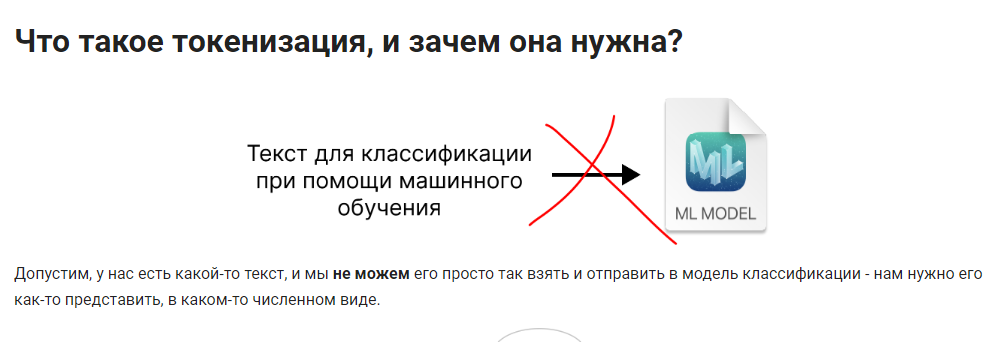

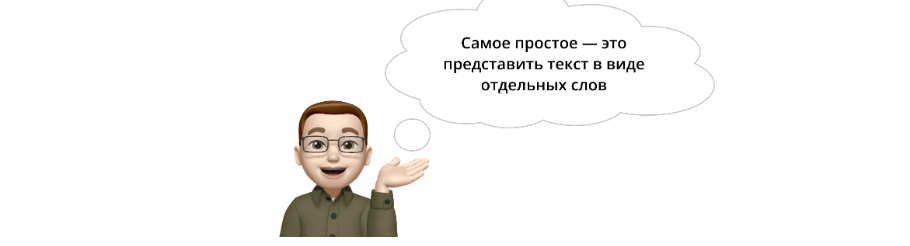

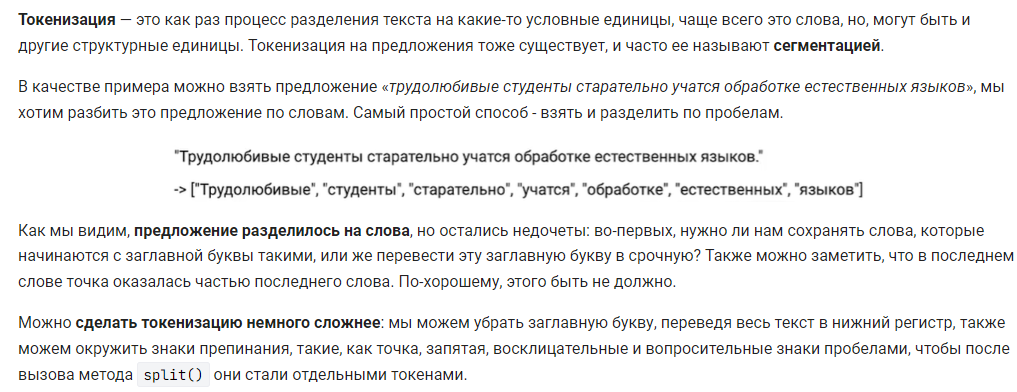

In [ ]:
import re

s = "Трудолюбивые студенты старательно учатся обработке естественных языков."
s = s.lower()
s = re.sub("([.,!?])", r" \1 ", s)  # окружить данные символы пробелами
s = re.sub(r" {2,}", " ", s)  # убрать дублирующие пробелы
print(s)

трудолюбивые студенты старательно учатся обработке естественных языков . 


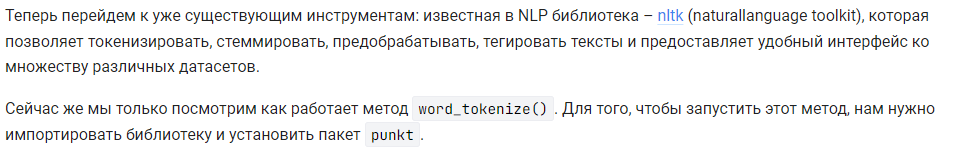

In [ ]:
import nltk

nltk.download('punkt')

nltk.word_tokenize("Трудолюбивые студенты старательно учатся обработке естественных языков.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Трудолюбивые',
 'студенты',
 'старательно',
 'учатся',
 'обработке',
 'естественных',
 'языков',
 '.']

Как мы видим, предложение токенизировалось, точка выделилась в отдельный токен, и никаких дополнительных действий делать не нужно. Также nltk позволяет делить текст подлиннее на предложения:

In [ ]:
s = "В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель. Такие обработчики называются токенизаторами (англ. Tokenize). Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок)."
nltk.sent_tokenize(s)

['В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель.',
 'Такие обработчики называются токенизаторами (англ.',
 'Tokenize).',
 'Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок).']

Можно заметить, что такая токенизация работает не идеально: первое предложение отделилось хорошо, а вот место, где внутри текста есть сокращение, модель посчитала концом предложения, что, конечно, неправильно.

nltk - многоязычная библиотека, она работает на множестве разных языков, но есть и более специфические библиотеки, например, rusenttokenize, которая токенизирует предложения именно на русском языке.

In [ ]:
!pip install rusenttokenize # установить библиотеку rusenttokenize

from IPython.display import clear_output
clear_output() # удалить вывод ячейки

from rusenttokenize import ru_sent_tokenize


In [ ]:
s = "В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель. Такие обработчики называются токенизаторами (англ. Tokenize). Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок)."
ru_sent_tokenize(s)

['В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель.',
 'Такие обработчики называются токенизаторами (англ. Tokenize).',
 'Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок).']

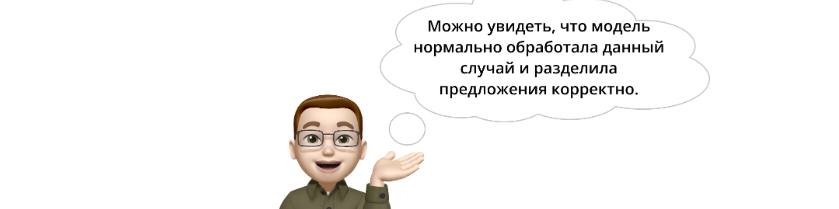

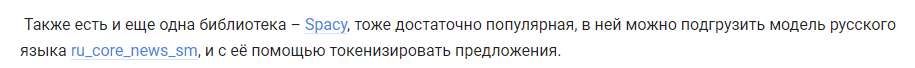

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm

from IPython.display import clear_output
clear_output()

import spacy
nlp = spacy.load("ru_core_news_sm")


s = "В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель. Такие обработчики называются токенизаторами (англ. Tokenize). Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок)."

doc = nlp(s)
list(doc.sents)

[В машинном обучении используются специальные обработчики исходного текста, которые позволяют разбить его на блоки, пригодные для подачи в модель.,
 Такие обработчики называются токенизаторами (англ. Tokenize).,
 Токенизация — самый первый шаг при обработке текста, результатом которого является набор (список) так называемых токенов (подстрок).]

Как можно увидеть, модель Spacy тоже справилась с разделением текста на предложения. Также мы можем, если наша задача того требует, сначала разделить текст на предложения, а потом каждое предложение разделить на токены, и получим список списков, где каждый внешний список — это предложение, а внутри этого предложения отдельные слова - токены.

In [ ]:
[nltk.word_tokenize(x.text) for x in doc.sents]

[['В',
  'машинном',
  'обучении',
  'используются',
  'специальные',
  'обработчики',
  'исходного',
  'текста',
  ',',
  'которые',
  'позволяют',
  'разбить',
  'его',
  'на',
  'блоки',
  ',',
  'пригодные',
  'для',
  'подачи',
  'в',
  'модель',
  '.'],
 ['Такие',
  'обработчики',
  'называются',
  'токенизаторами',
  '(',
  'англ',
  '.',
  'Tokenize',
  ')',
  '.'],
 ['Токенизация',
  '—',
  'самый',
  'первый',
  'шаг',
  'при',
  'обработке',
  'текста',
  ',',
  'результатом',
  'которого',
  'является',
  'набор',
  '(',
  'список',
  ')',
  'так',
  'называемых',
  'токенов',
  '(',
  'подстрок',
  ')',
  '.']]

Разобрав токенизацию, можно перейти к лемматизации. Допустим, у нас есть слово «трудолюбивые». В русском языке слова имеют разные формы, то есть, в зависимости от падежа, у слова изменяется окончание. Нужно ли модели считать что эти слова разные, или же это одни и те же слова? Разумеется, мы бы хотели, чтобы формы слова учитывались как одно слово, потому что они в сущности одинаковые, и отличается только окончание, поэтому мы бы хотели, чтобы слово, которое встретилось в какой-то нестандартной форме, оказалось в своей нормальной форме, и потом поступило бы в модель в этой нормальной форме. В случае слова «трудолюбивые» это будет «трудолюбивый», в случае какого-то глагола это будет его инфинитивная форма.

Лемматизация — это вид предобработки, в котором мы каждое слово заменяем его нормальной формой.

Если у нас есть предложение «трудолюбивые студенты старательно учатся обработке естественных языков», то после запуска модели у нас получится «трудолюбивый студент старательно учиться обработка естественный язык».

In [ ]:
import spacy

nlp = spacy.load("ru_core_news_sm")
lemmatizer = nlp.get_pipe("lemmatizer")

s2 = 'трудолюбивые студенты старательно учатся обработке естественных языков'
print(lemmatizer.mode)  # какой лемматизатор используется
print([token.lemma_ for token in nlp(s2)])

pymorphy3
['трудолюбивый', 'студент', 'старательно', 'учиться', 'обработка', 'естественный', 'язык']


 Как можно заметить, мы использовали модель Spacy,  ту же самую для русского языка. Если вывести у этого лемматизатора атрибут mode, то видно, что модель, которая используется внутри Space — это pymorphy3.

pymorphy3 - это отдельная библиотека для русского языка, которая позволяет производить много разных манипуляций, в том числе и лемматизацию.

In [ ]:
import pymorphy3
import nltk

morph = pymorphy3.MorphAnalyzer()

s2 = 'трудолюбивые студенты старательно учатся обработке естественных языков'
print([morph.parse(w)[0].normal_form for w in nltk.word_tokenize(s2)])

['трудолюбивый', 'студент', 'старательно', 'учиться', 'обработка', 'естественный', 'язык']


Лемматизация не самая простая вещь, которую можно попробовать, если у нас есть какая-то проблема с формами слов. У разных слов разные окончания, и можно привести эти разные слова в одну и ту же форму, просто обрезав эти окончания.

Стемминг как раз преследует эту идею, превращая слово «учатся» в «учат», «старательно» в «старательно» и так далее. Чтобы сделать это в коде можно использовать пакет stem из библиотеки nltk, в котором есть snowball stemmer, который также поддерживает русский.

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="russian")

s2 = 'трудолюбивые студенты старательно учатся обработке естественных языков'
for token in nltk.word_tokenize(s2):
    print(token + ' --> ' + stemmer.stem(token))

трудолюбивые --> трудолюбив
студенты --> студент
старательно --> старательн
учатся --> учат
обработке --> обработк
естественных --> естествен
языков --> язык


Допустим, мы хотим найти в Яндексе какие-то статьи по запросу «коврик для мыши», и получаем в выдаче 3 статьи:

первая содержит все три слова по паре раз
вторая статья содержит только слово «коврик» несколько раз
третья содержит только предлог «для» 1000 раз.
Нужно ли эту третью статью оценивать выше чем предыдущие, потому что там одно из слов встречается чаще? Разумеется, нет. Мы этого не хотим, потому что предлог «для» не несет большой информации, это стоп-слово не имеющее особого смысла.

В nltk есть пакет, который позволяет для многих языков получить список стоп-слов. В нем, в основном, союзы, предлоги и некоторые наречия.  

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

for i in range(len(stopwords.words("russian")) // 10 + 1):
    print(stopwords.words("russian")[10 * i:10 *(i + 1)])

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']
['как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты']
['к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне']
['было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь']
['когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть']
['был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там']
['потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо']
['ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без']
['будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто']
['этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один']
['почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех']
['никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над']
['больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много']
['разве', 'три', 'эту'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

s3 = "которые позволяют разбить его на блоки, пригодные для подачи в модель"
[w for w in nltk.word_tokenize(s3) if w not in stopwords.words("russian")]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['которые',
 'позволяют',
 'разбить',
 'блоки',
 ',',
 'пригодные',
 'подачи',
 'модель']

nltk также содержит в себе множество разных датасетов, в свое время они были наиболее популярными данными на которых проводили все эксперименты. Это размеченные датасеты Brown и Reuters. Reuters - это новостное агентство, которое выкладывало огромное количество новостей по жанрам.

В Brown можно получить слова из какой-то конкретной категории, например, из новостей. Также можно итерироваться по отдельным файлам - взять информацию из отдельного файла или из сразу нескольких категорий. Таким образом, nltk позволяет нам протестировать наш код на каких-то данных не загружая их дополнительно из интернета, и это достаточно качественные данные, на которых уже проводилось очень много экспериментов.

In [ ]:
import nltk
from nltk.corpus import brown, reuters

nltk.download("brown")
brown.raw()[:100]


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


'\n\n\tThe/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn'

In [ ]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

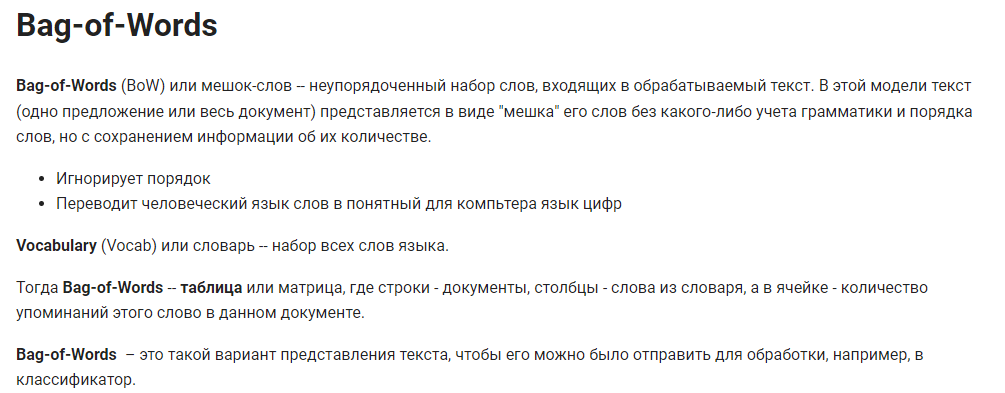

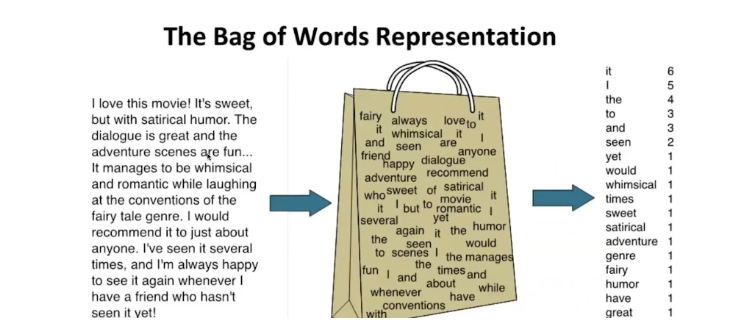

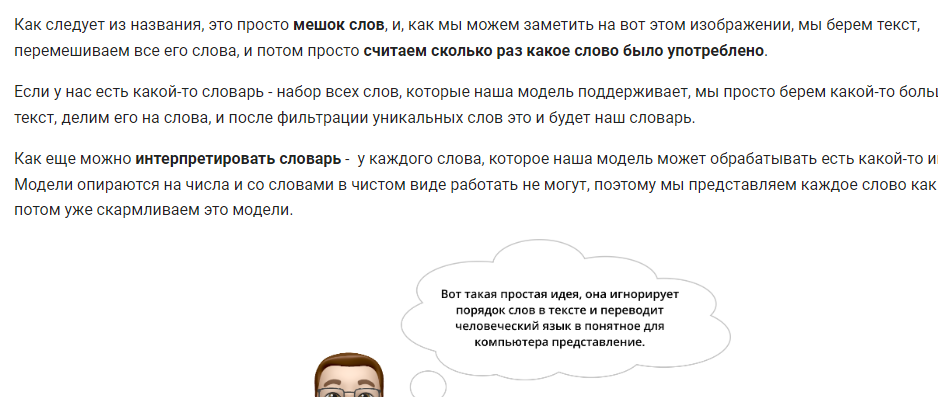

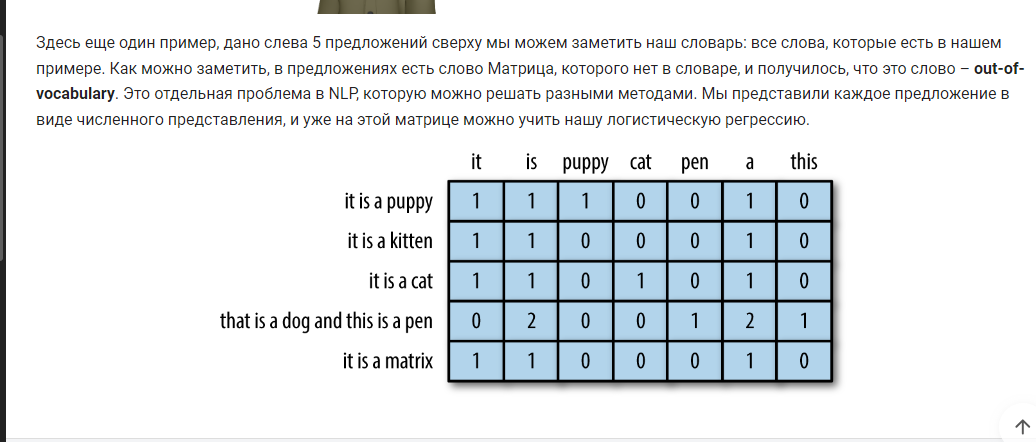

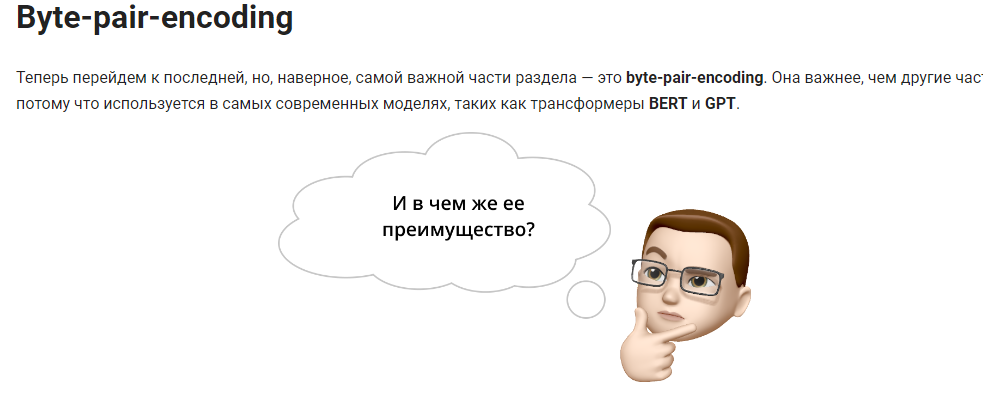

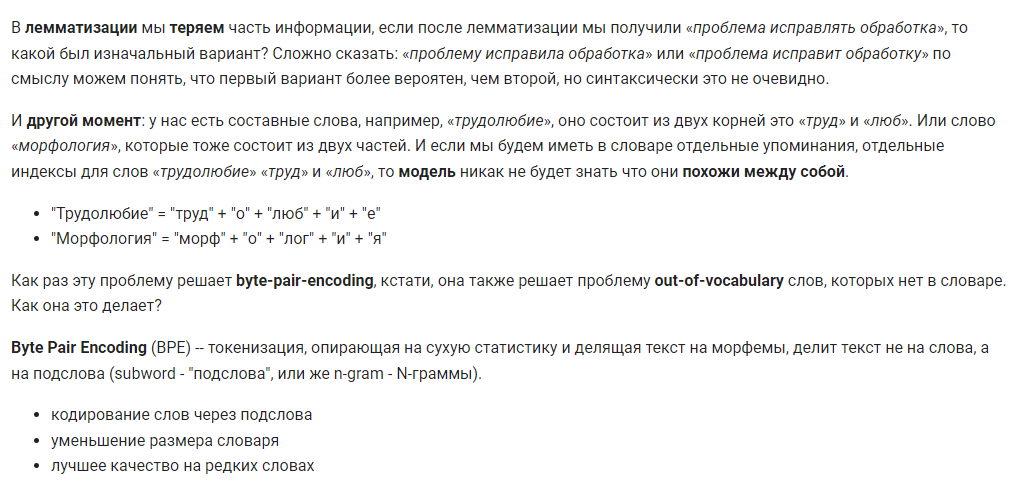

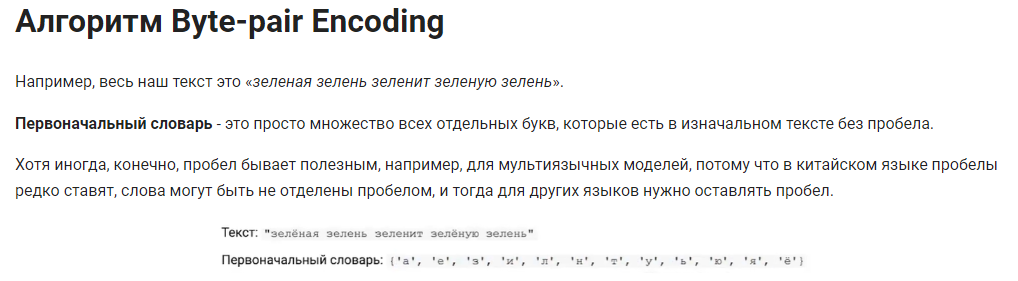

In [1]:
text = "зелёная зелень зеленит зелёную зелень"
vocab = set(text) - {' '}
vocab

{'а', 'е', 'з', 'и', 'л', 'н', 'т', 'у', 'ь', 'ю', 'я', 'ё'}

Здесь же мы разделили все на слова, но слова — это не то что мы хотим, мы хотим получить подслова, самые популярные, самые наиболее встречаемые в этом тексте. Тут самое заметно это «зел». Как это можно сделать?

Алгоритм не такой сложный - для всех букв, которые у нас есть в словаре, считаем пары букв, которые наиболее часто встречаются. Наши кандидаты — это сумма двух букв в словаре.

In [2]:
from collections import Counter


def count(text):
    candidates = {w1 + w2 for w1 in vocab for w2 in vocab} - vocab
    max_len = max(len(w) for w in candidates)

    occurences = []
    for i in range(len(text)):
        for j in range(1, min(max_len, len(text) - i) + 1):
            if text[i:i + j] in candidates:
                occurences.append(text[i:i + j])

    return Counter(occurences)

In [3]:
text = "зелёная зелень зеленит зелёную зелень"
vocab = set(text) - {' '}
count(text)

Counter({'зе': 5,
         'ел': 5,
         'лё': 2,
         'ён': 2,
         'на': 1,
         'ая': 1,
         'ле': 3,
         'ен': 3,
         'нь': 2,
         'ни': 1,
         'ит': 1,
         'ну': 1,
         'ую': 1})

Среди всех вариантов мы отбираем те, которые встречаются наиболее часто в нашем тексте, то есть в предложении «зеленая зелень зеленит зеленую зелень». В итоге мы получили словарь, в который мы оперативно добавляем токены-подслова, которые наиболее часто появляются в нашем тексте.

Алгоритм BPE позволяет без зависимости от конкретного языка находить отдельные корни и выделять их в слова словаря.

Разумеется, алгоритм, который я здесь реализовал, это лишь псевдокод, на самом деле алгоритм немного сложнее и учитывает больше нюансов. Например, в случае когда какая-то морфема употребляется внутри слова, а не в начале.

Если у нас есть слово «овал» и слово «бордовый», «ов» в начале слова имеет другой смысл, чем «ов», который находится в середине какого-то слова. Поэтому при делении на токены к нему будут добавлены две решетки, чтобы обозначить что «ов» это не новое слово, а часть старого.

Инструменты
Зачем нам изобретать велосипед, когда за нас уже все реализовали. Есть библиотека tokenizers, которая позволяет использовать токенизатор буквально в несколько строк кода.

Мы просто объявляем токенизатор, учим BPETrainer, записываем наш текст в файл и потом запускаем.

In [4]:
!pip install tokenizers

from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(vocab_size=20, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()

text = "зелёная зелень зеленит зелёную зелень"

with open("text.txt", "w", encoding="utf-8") as f:
    f.write(text)

tokenizer.train(["text.txt"], trainer)
tokenizer.get_vocab()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.9 MB/s eta 0:00:00


{'[SEP]': 2,
 'ен': 19,
 'н': 10,
 'ь': 13,
 'зел': 18,
 '[CLS]': 1,
 'т': 11,
 'ё': 16,
 'ю': 14,
 '[UNK]': 0,
 'и': 8,
 'е': 6,
 'а': 5,
 'з': 7,
 'я': 15,
 '[PAD]': 3,
 '[MASK]': 4,
 'л': 9,
 'у': 12,
 'ел': 17}

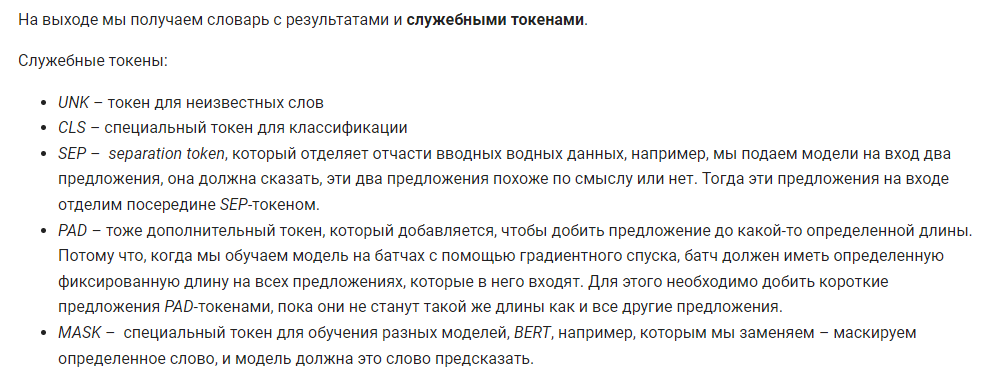

In [5]:
output = tokenizer.encode("зелень зеленит")
output.tokens

['зел', 'ен', 'ь', 'зел', 'ен', 'и', 'т']